In [4]:
!pip install xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.7 MB/s eta 0:00:0000:010:01


In [7]:
!pip install cftime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.5 MB/s eta 0:00:0000:010:01


In [18]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'Oceanography Datasets',
 '.jupyter',
 'Physics_4AL_2023-24',
 '.config',
 'shareWithInstructor',
 'ODV2713.TXT',
 '.cache',
 '.ipython',
 '.npm',
 '.local']

Shape of time: (144, 144)
Shape of pressure: (144, 144)
Shape of temperature: (144, 144)


/tmp/ipykernel_196/1834234553.py:49: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


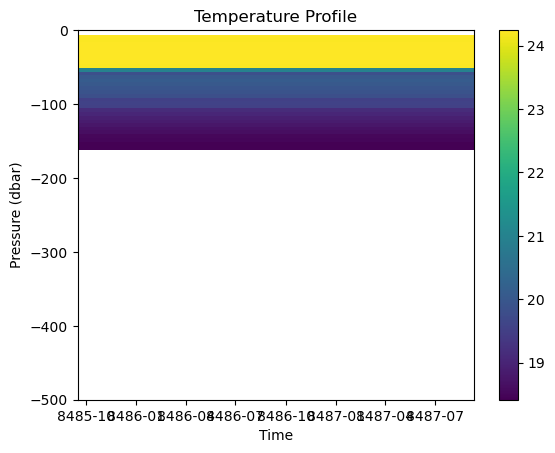

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Load TXT file
txtfile = "2713_Sprof.txt"

# Read data (assuming it's space-separated; change delimiter if needed)
df = pd.read_csv(txtfile, delimiter=' ', on_bad_lines='skip')

# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

# Convert Julian Date (JULD) to datetime
date = df['JULD'] + 2400000.5  # Convert MJD to Julian date
date_time = [datetime(1858, 11, 17) + timedelta(days=d) for d in date]  # MJD reference date

# Ensure temperature is 1D
T = df['TEMP'].values  # Convert to numpy array for easier manipulation

# If 'T' is 1D, we need to reshape it to a 2D array.
# Let's assume we have one temperature value for each pressure level and time step:
# Reshape T to match the number of pressure levels (if T is 1D)
num_pressure_levels = len(df['PRES'])
T_reshaped = np.tile(T, (num_pressure_levels, 1))  # Repeat temperature values for each pressure level

# Repeat the date for the dimensions of the 'TEMP' data
# We are repeating time values to match the dimensions of the reshaped 'TEMP' data
time = np.tile(date_time, (num_pressure_levels, 1))  # Repeat date_time for each pressure value
time = time.T  # Transpose to align with temperature and pressure

# Ensure pressure is 1D and repeated to match the time
p = df['PRES']
p_reshaped = np.tile(p, (len(date_time), 1))  # Repeat pressure values for each time step

# Check the shapes again
print(f"Shape of time: {time.shape}")
print(f"Shape of pressure: {p_reshaped.shape}")
print(f"Shape of temperature: {T_reshaped.shape}")

# Create the figure for plotting
plt.figure()

# Create the pcolor plot (time vs pressure vs temperature)
plt.pcolor(time, -p_reshaped, T_reshaped, shading='auto')

# Add color bar and labels
plt.colorbar()
plt.ylim([-500, 0])  # Pressure range (adjust as needed)
plt.xlabel('Time')
plt.ylabel('Pressure (dbar)')
plt.title('Temperature Profile')

# Show the plot
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.image as mpimg

def plot_temperature_profile(txtfile, image_path=None):
    """
    Function to plot a temperature profile from a given TXT dataset.
    
    Parameters:
        txtfile (str): Path to the dataset file.
        image_path (str, optional): Path to an image file to overlay.
    """
    try:
        # Read data (assuming space-separated; adjust delimiter if needed)
        df = pd.read_csv(txtfile, delimiter=' ', on_bad_lines='skip')

        # Strip any leading/trailing spaces from the column names
        df.columns = df.columns.str.strip()

        # Validate necessary columns exist
        required_cols = {'JULD', 'PRES', 'TEMP'}
        if not required_cols.issubset(df.columns):
            raise ValueError(f"Dataset must contain columns: {required_cols}. Found: {set(df.columns)}")

        # Convert Julian Date (JULD) to datetime
        date = df['JULD'] + 2400000.5  # Convert MJD to Julian date
        date_time = [datetime(1858, 11, 17) + timedelta(days=d) for d in date]  # MJD reference date

        # Ensure temperature is 1D
        T = df['TEMP'].values  # Convert to numpy array

        # Reshape temperature data for visualization
        num_pressure_levels = len(df['PRES'])
        T_reshaped = np.tile(T, (num_pressure_levels, 1))  # Repeat values

        # Repeat the date for dimensions of 'TEMP'
        time = np.tile(date_time, (num_pressure_levels, 1)).T  # Transpose for alignment

        # Ensure pressure is 1D and repeated to match time
        p = df['PRES']
        p_reshaped = np.tile(p, (len(date_time), 1))  # Repeat for each time step

        # Debugging prints (optional)
        print(f"Shape of time: {time.shape}")
        print(f"Shape of pressure: {p_reshaped.shape}")
        print(f"Shape of temperature: {T_reshaped.shape}")

        # Create the figure for plotting
        fig, ax = plt.subplots(figsize=(10, 6))

        # Add optional background image
        if image_path:
            img = mpimg.imread(image_path)
            ax.imshow(img, aspect='auto', extent=[date_time[0], date_time[-1], -max(p), 0], alpha=0.3)

        # Create the pcolor plot (time vs pressure vs temperature)
        c = ax.pcolor(time, -p_reshaped, T_reshaped, shading='auto')

        # Add color bar and labels
        plt.colorbar(c, label='Temperature')
        ax.set_ylim([-500, 0])  # Adjust pressure range
        ax.set_xlabel('Time')
        ax.set_ylabel('Pressure (dbar)')
        ax.set_title('Temperature Profile')

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"Error processing file: {e}")



Shape of time: (144, 144)
Shape of pressure: (144, 144)
Shape of temperature: (144, 144)


/tmp/ipykernel_103/3766593657.py:62: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(c, label='Temperature')


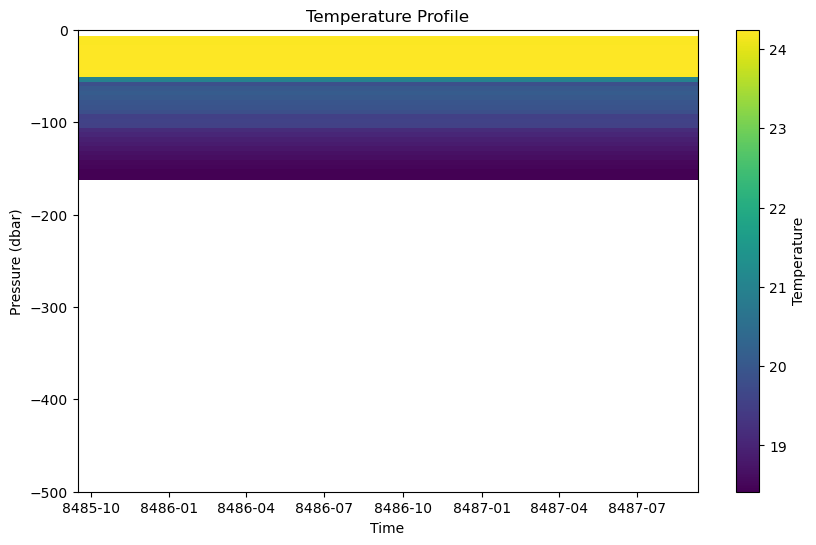

In [2]:
plot_temperature_profile("2713_Sprof.txt", image_path=None)